Epoch 1/10


C:\Users\gmctp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 37s 302ms/step - loss: 2.4885 - accuracy: 0.3868 - val_loss: 1.9093 - val_accuracy: 0.4797
Epoch 2/10


C:\Users\gmctp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 31s 275ms/step - loss: 1.7839 - accuracy: 0.5168 - val_loss: 1.8835 - val_accuracy: 0.4124
Epoch 3/10
113/113 [==============================] - 32s 282ms/step - loss: 1.6674 - accuracy: 0.5408 - val_loss: 1.6920 - val_accuracy: 0.5270
Epoch 4/10
113/113 [==============================] - 32s 286ms/step - loss: 1.4862 - accuracy: 0.5880 - val_loss: 1.5612 - val_accuracy: 0.6055
Epoch 5/10
113/113 [==============================] - 33s 290ms/step - loss: 1.3511 - accuracy: 0.6302 - val_loss: 1.5255 - val_accuracy: 0.6266
Epoch 6/10
113/113 [==============================] - 39s 347ms/step - loss: 1.2099 - accuracy: 0.6658 - val_loss: 1.5353 - val_accuracy: 0.6171
Epoch 7/10
113/113 [==============================] - 33s 295ms/step - loss: 1.1463 - accuracy: 0.6839 - val_loss: 1.4736 - val_accuracy: 0.6355
Epoch 8/10
113/113 [==============================] - 40s 351ms/step - loss: 1.0015 - accuracy: 0.7278 - val_loss: 1.4731 - val_accuracy: 0.6

C:\Users\gmctp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmctp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gmctp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25        12
           1       0.55      0.59      0.57       105
           2       0.00      0.00      0.00        20
           3       0.89      0.91      0.90       813
           4       0.75      0.81      0.78       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.20      0.05      0.08        38
           9       0.25      0.08      0.12        25
          10       0.24      0.73      0.36        30
          11       0.26      0.43      0.32        83
          12       0.00      0.00      0.00        13
          13       0.17      0.22      0.19        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.36      0.40      0.38        99
          17       0.00    

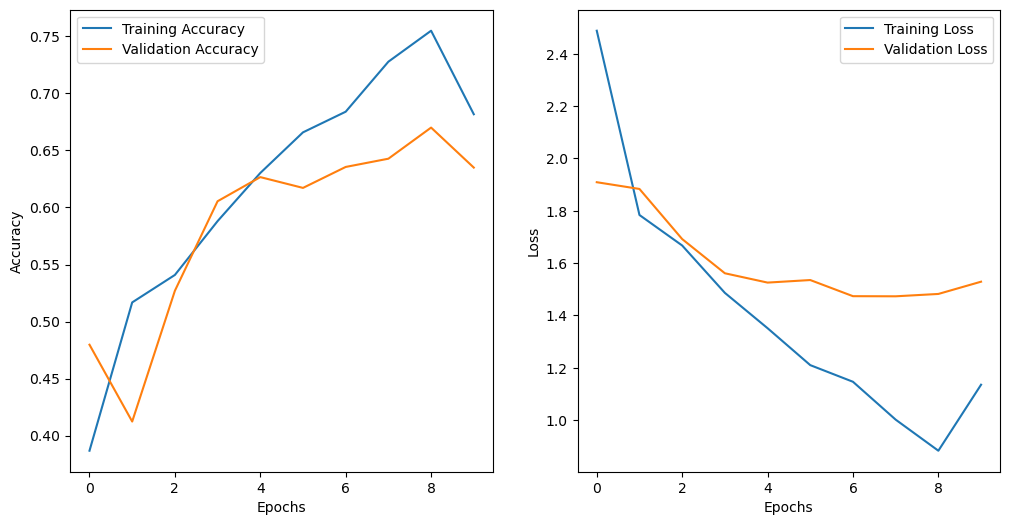

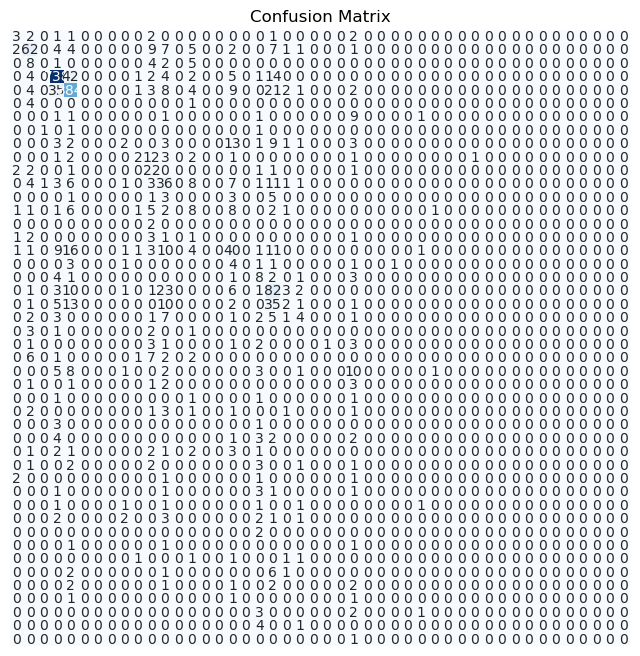

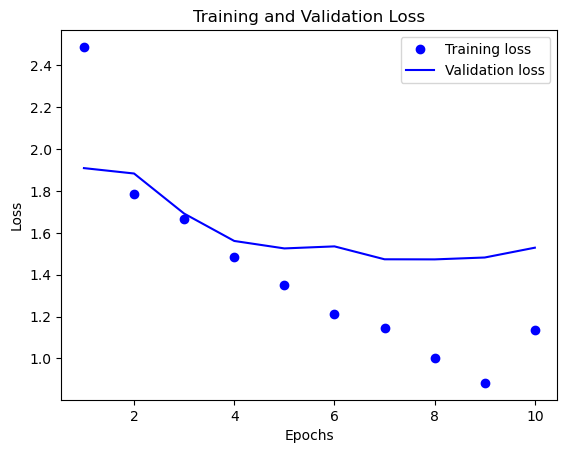

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report



tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json")

# Load the Reuters dataset
from tensorflow.keras.datasets import reuters

# Load the dataset and specify the number of top words to consider
max_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

# Load the word index for mapping words to integers
word_index = reuters.get_word_index(path="reuters_word_index.json")

# Reverse the word index to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode one of the news articles to see the original text
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

# Preprocess the Reuters dataset
max_sequence_length = 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

# Perform one-hot encoding of labels
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build a neural network model for text classification
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),
    keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')  # 46 classes for Reuters dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks for TensorBoard and ModelCheckpoint
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1)
model_checkpoint = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=10, batch_size=64, 
                    validation_data=(x_val, y_val), 
                    callbacks=[tensorboard_callback, model_checkpoint])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Generate a confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix')

# Generate a classification report
print(classification_report(y_test_classes, y_pred_classes))

# Check for signs of overfitting using validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.show()